In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
INFY=pd.read_csv('infy_stock.csv')



In [3]:
# in tsa we need to set date from string to datetime format
INFY['Date'].dtype

dtype('O')

In [4]:
INFY["Date"] = pd.to_datetime(INFY["Date"])
# TCS["Date"] = pd.to_datetime(TCS["Date"])
# NIFTY["Date"] = pd.to_datetime(NIFTY["Date"])

In [5]:

INFY.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154
1,2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371
2,2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370
3,2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332
4,2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270


In [6]:
# selecting closing price of infy for each day
INFYdf=INFY[['Date','Close']]
INFYdf.head()

,Date,Close
0,2015-01-01,1974.40
1,2015-01-02,2013.20
2,2015-01-05,1995.90
3,2015-01-06,1954.20
4,2015-01-07,1963.55


In [7]:
# setting date as index
INFYdf.set_index('Date',inplace=True)
INFYdf.head()

,Close
Date,
2015-01-01,1974.40
2015-01-02,2013.20
2015-01-05,1995.90
2015-01-06,1954.20
2015-01-07,1963.55


- learning about data

In [8]:
print(INFYdf.index.min(),INFYdf.index.max()) #data here is of year 2015
INFYdf.shape #shape of data

2015-01-01 00:00:00 2015-12-31 00:00:00


(248, 1)

In [9]:
# checking for null vals
INFYdf.isnull().sum()

Close    0
dtype: int64

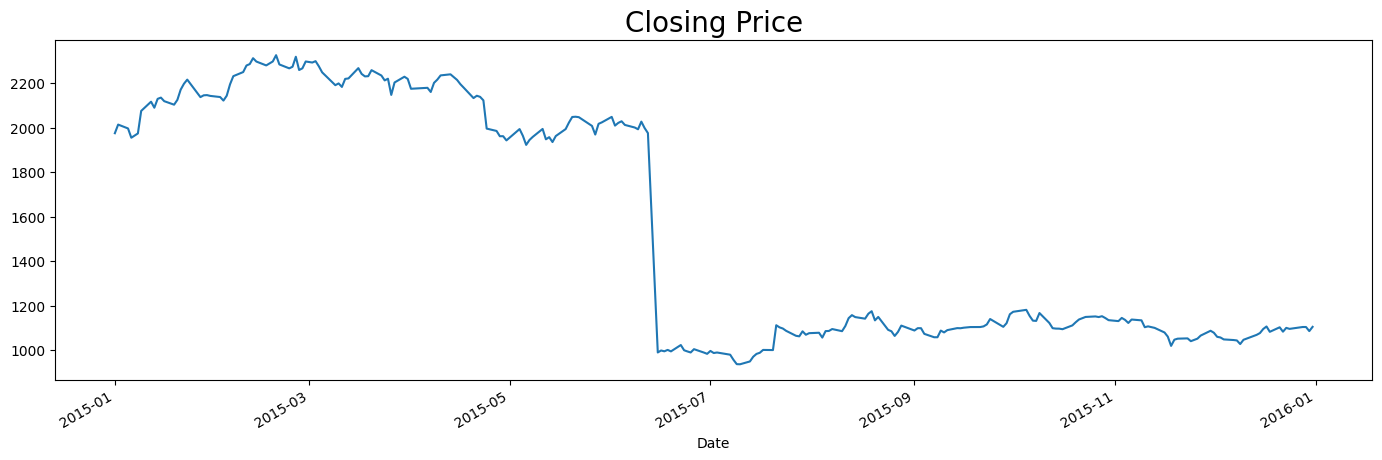

In [10]:
plt.figure(figsize=(17,5))
INFYdf.Close.plot()
plt.title("Closing Price",fontsize=20)
plt.show()

# Stock split-up 
- a "split" or "stock split" occurs when a company decides to divide its existing shares into multiple shares. The total value of the shares remains the same, but the number of shares increases.
- Stock splits are often used to make a company's shares more affordable for individual investors, as the lower share price may make it easier to buy and sell shares in smaller quantities. However, the split itself does not change the underlying value of the company or the investment proposition.


- from the fig we can conclude:
 1. there is a huge drop on 15th june 2015 in infosys share.If we take this whole data, the prediction might not be as expected as there is a split in between!
2. split is 2 for 1,we can normalize the data prior to split by dividing them by 2. (Old shares are half that of today's share).

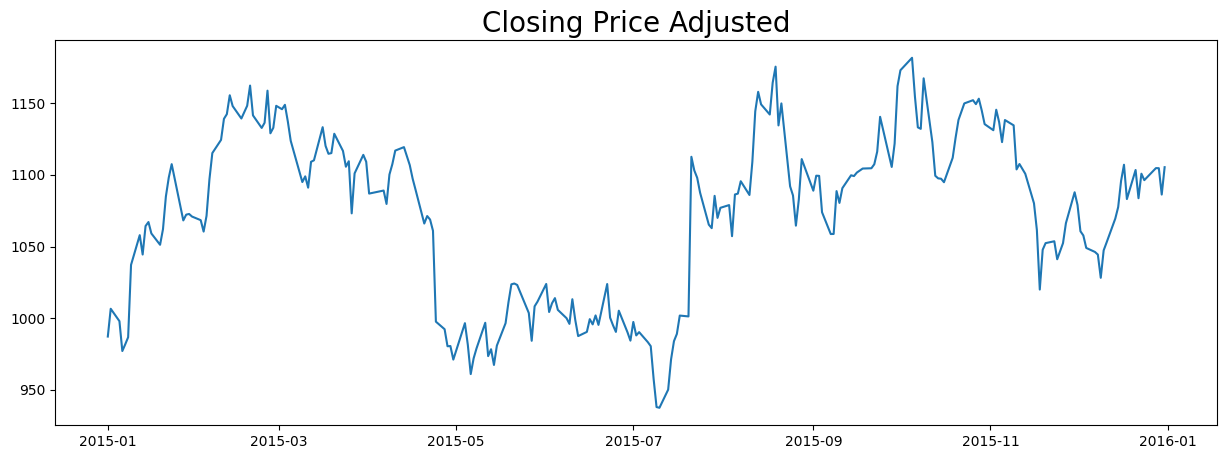

In [11]:
plt.figure(figsize=(15,5))
stock_df=pd.concat([INFYdf.Close['2015-01-01':'2015-06-12']/2,INFYdf.Close['2015-06-15':'2015-12-31']])
plt.plot(stock_df)
plt.title("Closing Price Adjusted",fontsize=20)
plt.show()

In [12]:
# traindf=stock_df.iloc[:180]
# testdf=stock_df.iloc[180:]

def plots(pred,title):
    plt.figure(figsize=(15,5))
    plt.plot(traindf,label='Training data')
    plt.plot(testdf,label='Testing data')
    plt.plot(pred,label='predictid')
    plt.ylabel("Stock prices")
    plt.title(title,fontsize=20)
    plt.legend()
    plt.show()

In [13]:
y_train = stock_df[80:180]
y_test = stock_df[180:]
print("y train:",y_train.shape,"\ny test:",y_test.shape)

y train: (100,) 
y test: (68,)


In [14]:
X_train = pd.DataFrame([list(stock_df[i:i+80]) for i in range(100)],
                       columns=range(80,0,-1),index=y_train.index)
X_test = pd.DataFrame([list(stock_df[i:i+80]) for i in range(100,168)],
                       columns=range(80,0,-1),index=y_test.index)

X_train

,80,79,78,77,76,75,74,73,72,71,...,10,9,8,7,6,5,4,3,2,1
Date,,,,,,,,,,,,,,,,,,,,,
2015-04-30,987.200,1006.600,997.950,977.100,981.775,986.725,1037.225,1057.975,1044.450,1064.325,...,1097.325,1089.625,1066.075,1071.300,1068.850,1061.000,997.600,992.325,980.450,980.575
2015-05-04,1006.600,997.950,977.100,981.775,986.725,1037.225,1057.975,1044.450,1064.325,1067.125,...,1089.625,1066.075,1071.300,1068.850,1061.000,997.600,992.325,980.450,980.575,971.125
2015-05-05,997.950,977.100,981.775,986.725,1037.225,1057.975,1044.450,1064.325,1067.125,1059.150,...,1066.075,1071.300,1068.850,1061.000,997.600,992.325,980.450,980.575,971.125,996.550
2015-05-06,977.100,981.775,986.725,1037.225,1057.975,1044.450,1064.325,1067.125,1059.150,1051.250,...,1071.300,1068.850,1061.000,997.600,992.325,980.450,980.575,971.125,996.550,981.375
2015-05-07,981.775,986.725,1037.225,1057.975,1044.450,1064.325,1067.125,1059.150,1051.250,1062.100,...,1068.850,1061.000,997.600,992.325,980.450,980.575,971.125,996.550,981.375,961.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-09-11,1023.225,1008.400,1003.650,984.250,1008.300,1011.575,1023.900,1004.325,1010.450,1014.025,...,1111.050,1094.400,1089.000,1099.450,1099.350,1073.950,1058.750,1058.800,1088.700,1080.450
2015-09-14,1008.400,1003.650,984.250,1008.300,1011.575,1023.900,1004.325,1010.450,1014.025,1005.825,...,1094.400,1089.000,1099.450,1099.350,1073.950,1058.750,1058.800,1088.700,1080.450,1090.750
2015-09-15,1003.650,984.250,1008.300,1011.575,1023.900,1004.325,1010.450,1014.025,1005.825,1000.025,...,1089.000,1099.450,1099.350,1073.950,1058.750,1058.800,1088.700,1080.450,1090.750,1099.750


In [15]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [16]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train, y_train)
y_las = lasso.predict(X_test)
y_las = pd.Series(y_las, index=y_test.index)
# print(y_las)
# print(y_test)
mse(y_las, y_test), np.sqrt(mse(y_test, y_las))


c:\Users\Sakshi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.020e+02, tolerance: 3.391e+01
  model = cd_fast.enet_coordinate_descent(


(1467.3338646133916, 38.305794138920966)

In [17]:
# create input dataset for next 5 days
input_data = stock_df[-80:].values.reshape(1, -1)

# make predictions
predicted_prices = lasso.predict(input_data)

# print predicted prices for the next 5 days
print("Predicted avg closing prices for next 5 days:")
print(predicted_prices)


Predicted avg closing prices for next 5 days:
[1083.22115208]


- from this we can make an approx prediction if we want to sell our stock or not